In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_GARCH
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
def create_sim(params = [0.06, 0.91], num = 100, sim_num = 500, sim_length = 500, plot = False):
    lls, alpha, beta, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = Panel_GARCH(plot = plot)
    
    for i in range(sim_num):
        np.random.seed(i)
        y, X = model.simulate(params = params, num = num)
        start = time.time()
        model.fit(['01' ,'01'], X)
        runtime[i] = time.time() - start
        
        print("{}st iteration's runTime: {} sec.\n".format(i+1, round(runtime[i], 4)))
        lls[i] = model.opt.fun
        alpha[i] = model.optimized_params[0]
        beta[i] = model.optimized_params[1]
    
    return lls, alpha, beta, runtime

In [3]:
sim1000_half = pd.DataFrame(create_sim(num = 50, sim_length = 1000))

1st iteration's runTime: 7.014 sec.

2st iteration's runTime: 6.9396 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)


3st iteration's runTime: 16.1487 sec.

4st iteration's runTime: 6.5845 sec.

5st iteration's runTime: 5.5623 sec.

6st iteration's runTime: 7.1826 sec.

7st iteration's runTime: 6.5885 sec.

8st iteration's runTime: 6.2894 sec.

9st iteration's runTime: 6.8476 sec.

10st iteration's runTime: 7.6128 sec.

11st iteration's runTime: 6.9566 sec.

12st iteration's runTime: 7.2736 sec.

13st iteration's runTime: 6.8876 sec.

14st iteration's runTime: 6.2484 sec.

15st iteration's runTime: 7.3086 sec.

16st iteration's runTime: 5.6203 sec.

17st iteration's runTime: 6.8806 sec.

18st iteration's runTime: 7.5157 sec.

19st iteration's runTime: 5.9093 sec.

20st iteration's runTime: 6.6505 sec.

21st iteration's runTime: 7.6197 sec.

22st iteration's runTime: 6.8866 sec.

23st iteration's runTime: 6.3054 sec.

24st iteration's runTime: 5.9614 sec.

25st iteration's runTime: 6.5925 sec.

26st iteration's runTime: 6.2554 sec.

27st iteration's runTime: 7.6367 sec.

28st iteration's runTime: 7.027

211st iteration's runTime: 6.2373 sec.

212st iteration's runTime: 7.339 sec.

213st iteration's runTime: 6.2382 sec.

214st iteration's runTime: 6.241 sec.

215st iteration's runTime: 6.6065 sec.

216st iteration's runTime: 6.9196 sec.

217st iteration's runTime: 7.3027 sec.

218st iteration's runTime: 5.8693 sec.

219st iteration's runTime: 6.6285 sec.

220st iteration's runTime: 6.9516 sec.

221st iteration's runTime: 7.6487 sec.

222st iteration's runTime: 6.6015 sec.

223st iteration's runTime: 6.1814 sec.

224st iteration's runTime: 6.5585 sec.

225st iteration's runTime: 6.9326 sec.

226st iteration's runTime: 7.6417 sec.

227st iteration's runTime: 6.3106 sec.

228st iteration's runTime: 7.0386 sec.

229st iteration's runTime: 6.6145 sec.

230st iteration's runTime: 6.1244 sec.

231st iteration's runTime: 6.6325 sec.

232st iteration's runTime: 6.5325 sec.

233st iteration's runTime: 6.1884 sec.

234st iteration's runTime: 6.1514 sec.

235st iteration's runTime: 6.6215 sec.

23

416st iteration's runTime: 6.3034 sec.

417st iteration's runTime: 6.5105 sec.

418st iteration's runTime: 6.2064 sec.

419st iteration's runTime: 6.5805 sec.

420st iteration's runTime: 6.2434 sec.

421st iteration's runTime: 5.8783 sec.

422st iteration's runTime: 5.5172 sec.

423st iteration's runTime: 6.3314 sec.

424st iteration's runTime: 7.0536 sec.

425st iteration's runTime: 6.8346 sec.

426st iteration's runTime: 6.1964 sec.

427st iteration's runTime: 6.9756 sec.

428st iteration's runTime: 5.5883 sec.

429st iteration's runTime: 5.8673 sec.

430st iteration's runTime: 5.8453 sec.

431st iteration's runTime: 7.6167 sec.

432st iteration's runTime: 6.2004 sec.

433st iteration's runTime: 6.2644 sec.

434st iteration's runTime: 6.8996 sec.

435st iteration's runTime: 6.6635 sec.

436st iteration's runTime: 6.2514 sec.

437st iteration's runTime: 6.6435 sec.

438st iteration's runTime: 6.1744 sec.

439st iteration's runTime: 7.0506 sec.

440st iteration's runTime: 6.2604 sec.



In [4]:
sim1000_half = sim1000_half.T
sim1000_half.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000_half.csv')

In [5]:
sim1000_half_des = sim1000_half.describe()
sim1000_half_des

,0,1,2,3
count,4.890000e+02,500.000000,5.000000e+02,500.000000
mean,5.739634e+06,0.075835,8.911945e-01,6.810004
std,1.087533e+08,0.125371,1.210713e-01,1.515177
min,1.368260e+03,0.000001,1.817666e-35,4.566035
25%,1.385947e+03,0.057944,9.039060e-01,6.225910
50%,1.391989e+03,0.059461,9.067814e-01,6.587496
75%,1.398509e+03,0.061259,9.097935e-01,6.976620
max,2.379297e+09,1.000000,1.000000e+00,16.312693


In [15]:
sim1000 = pd.DataFrame(create_sim(sim_length = 1000))

1st iteration's runTime: 12.4515 sec.

2st iteration's runTime: 13.185 sec.

3st iteration's runTime: 11.6618 sec.

4st iteration's runTime: 12.1689 sec.

5st iteration's runTime: 11.5442 sec.

6st iteration's runTime: 14.4135 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)


7st iteration's runTime: 13.8783 sec.

8st iteration's runTime: 11.5473 sec.

9st iteration's runTime: 14.119 sec.

10st iteration's runTime: 13.5786 sec.

11st iteration's runTime: 12.1846 sec.

12st iteration's runTime: 12.7301 sec.

13st iteration's runTime: 11.4985 sec.

14st iteration's runTime: 10.8832 sec.

15st iteration's runTime: 12.0759 sec.

16st iteration's runTime: 11.0536 sec.

17st iteration's runTime: 12.743 sec.

18st iteration's runTime: 10.9661 sec.

19st iteration's runTime: 13.0126 sec.

20st iteration's runTime: 12.169 sec.

21st iteration's runTime: 11.4817 sec.

22st iteration's runTime: 13.4497 sec.

23st iteration's runTime: 12.8219 sec.

24st iteration's runTime: 11.1139 sec.

25st iteration's runTime: 10.8568 sec.

26st iteration's runTime: 12.6953 sec.

27st iteration's runTime: 12.0566 sec.

28st iteration's runTime: 12.0752 sec.

29st iteration's runTime: 12.8251 sec.

30st iteration's runTime: 14.0867 sec.

31st iteration's runTime: 13.4501 sec.

32st i

210st iteration's runTime: 14.8921 sec.

211st iteration's runTime: 11.5795 sec.

212st iteration's runTime: 12.8827 sec.

213st iteration's runTime: 11.3479 sec.

214st iteration's runTime: 13.8925 sec.

215st iteration's runTime: 11.1284 sec.

216st iteration's runTime: 13.2777 sec.

217st iteration's runTime: 15.668 sec.

218st iteration's runTime: 12.2525 sec.

219st iteration's runTime: 31.375 sec.

220st iteration's runTime: 14.6465 sec.

221st iteration's runTime: 14.1881 sec.

222st iteration's runTime: 11.5523 sec.

223st iteration's runTime: 13.3635 sec.

224st iteration's runTime: 15.5151 sec.

225st iteration's runTime: 11.3589 sec.

226st iteration's runTime: 13.6573 sec.

227st iteration's runTime: 11.666 sec.

228st iteration's runTime: 13.3901 sec.

229st iteration's runTime: 12.6341 sec.

230st iteration's runTime: 15.4576 sec.

231st iteration's runTime: 14.0845 sec.

232st iteration's runTime: 15.9036 sec.

233st iteration's runTime: 33.5107 sec.

234st iteration's r

411st iteration's runTime: 30.981 sec.

412st iteration's runTime: 11.1094 sec.

413st iteration's runTime: 11.386 sec.

414st iteration's runTime: 12.3401 sec.

415st iteration's runTime: 11.125 sec.

416st iteration's runTime: 11.2903 sec.

417st iteration's runTime: 13.8275 sec.

418st iteration's runTime: 14.0547 sec.

419st iteration's runTime: 13.7782 sec.

420st iteration's runTime: 13.4663 sec.

421st iteration's runTime: 12.5644 sec.

422st iteration's runTime: 17.8879 sec.

423st iteration's runTime: 17.3819 sec.

424st iteration's runTime: 18.4132 sec.

425st iteration's runTime: 15.0185 sec.

426st iteration's runTime: 15.6624 sec.

427st iteration's runTime: 14.876 sec.

428st iteration's runTime: 12.1246 sec.

429st iteration's runTime: 11.3164 sec.

430st iteration's runTime: 11.6795 sec.

431st iteration's runTime: 14.6414 sec.

432st iteration's runTime: 12.5579 sec.

433st iteration's runTime: 12.8629 sec.

434st iteration's runTime: 14.1381 sec.

435st iteration's ru

In [16]:
sim1000 = sim1000.T
sim1000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000.csv')
sim1000

,0,1,2,3
0,1385.307845,0.059707,0.905769,12.451476
1,1388.249229,0.062677,0.903418,13.184991
2,1397.106640,0.058935,0.907581,11.661775
3,1384.044310,0.062357,0.904242,12.168878
4,1383.853868,0.061303,0.900259,11.544200
...,...,...,...,...
495,1396.833159,0.059034,0.906861,14.796417
496,1390.806303,0.061504,0.901786,14.894768
497,NaN,0.047900,0.906692,33.646038
498,1383.495393,0.058623,0.908724,17.852672


In [17]:
sim1000_des = sim1000.describe()
sim1000_des

,0,1,2,3
count,4.780000e+02,500.000000,5.000000e+02,500.000000
mean,1.932284e+06,0.064417,9.019356e-01,14.055706
std,3.476370e+07,0.072894,7.035244e-02,4.158637
min,1.374952e+03,0.000011,1.195134e-26,9.368624
25%,1.387378e+03,0.058219,9.050870e-01,11.960227
50%,1.392338e+03,0.059445,9.070737e-01,12.980299
75%,1.396614e+03,0.060676,9.089456e-01,14.436468
max,7.463354e+08,1.000000,1.000000e+00,36.884909


In [11]:
sim2000 = pd.DataFrame(create_sim(num = 200, sim_length = 1000))

1st iteration's runTime: 25.5678 sec.

2st iteration's runTime: 24.1565 sec.

3st iteration's runTime: 25.5528 sec.

4st iteration's runTime: 22.5841 sec.

5st iteration's runTime: 25.8329 sec.

6st iteration's runTime: 26.9125 sec.

7st iteration's runTime: 28.0684 sec.

8st iteration's runTime: 23.9914 sec.

9st iteration's runTime: 24.0874 sec.

10st iteration's runTime: 25.4598 sec.



C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)


11st iteration's runTime: 65.3999 sec.

12st iteration's runTime: 28.3824 sec.

13st iteration's runTime: 25.4928 sec.

14st iteration's runTime: 25.1107 sec.

15st iteration's runTime: 25.2747 sec.

16st iteration's runTime: 25.4868 sec.

17st iteration's runTime: 26.6841 sec.

18st iteration's runTime: 23.9534 sec.

19st iteration's runTime: 24.0134 sec.

20st iteration's runTime: 26.43 sec.

21st iteration's runTime: 26.9141 sec.

22st iteration's runTime: 29.2986 sec.

23st iteration's runTime: 23.9444 sec.

24st iteration's runTime: 26.7621 sec.

25st iteration's runTime: 22.31 sec.

26st iteration's runTime: 25.2557 sec.



C:\Users\peter\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\peter\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\Users\peter\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1


27st iteration's runTime: 71.6292 sec.

28st iteration's runTime: 25.1527 sec.

29st iteration's runTime: 26.452 sec.

30st iteration's runTime: 29.3446 sec.

31st iteration's runTime: 25.1077 sec.

32st iteration's runTime: 25.2727 sec.

33st iteration's runTime: 32.0602 sec.

34st iteration's runTime: 29.2646 sec.

35st iteration's runTime: 25.1707 sec.

36st iteration's runTime: 25.2727 sec.

37st iteration's runTime: 32.1893 sec.

38st iteration's runTime: 24.0875 sec.

39st iteration's runTime: 25.2617 sec.

40st iteration's runTime: 23.7944 sec.

41st iteration's runTime: 64.7257 sec.

42st iteration's runTime: 25.2967 sec.

43st iteration's runTime: 25.0697 sec.

44st iteration's runTime: 26.614 sec.

45st iteration's runTime: 25.1457 sec.

46st iteration's runTime: 23.7584 sec.

47st iteration's runTime: 28.1214 sec.

48st iteration's runTime: 18.0901 sec.

49st iteration's runTime: 22.5881 sec.

50st iteration's runTime: 23.4673 sec.

51st iteration's runTime: 24.8906 sec.

52

230st iteration's runTime: 25.4851 sec.

231st iteration's runTime: 25.5108 sec.

232st iteration's runTime: 24.2661 sec.

233st iteration's runTime: 28.1356 sec.

234st iteration's runTime: 64.9784 sec.

235st iteration's runTime: 23.9834 sec.

236st iteration's runTime: 22.4971 sec.

237st iteration's runTime: 23.8724 sec.

238st iteration's runTime: 25.3537 sec.

239st iteration's runTime: 25.4648 sec.

240st iteration's runTime: 25.3767 sec.

241st iteration's runTime: 25.3567 sec.

242st iteration's runTime: 23.9264 sec.

243st iteration's runTime: 25.2737 sec.

244st iteration's runTime: 25.2927 sec.

245st iteration's runTime: 23.7394 sec.

246st iteration's runTime: 24.023 sec.

247st iteration's runTime: 23.9114 sec.

248st iteration's runTime: 28.1024 sec.

249st iteration's runTime: 23.8184 sec.

250st iteration's runTime: 28.3324 sec.

251st iteration's runTime: 26.8061 sec.

252st iteration's runTime: 26.58 sec.

253st iteration's runTime: 31.074 sec.

254st iteration's ru

431st iteration's runTime: 27.9233 sec.

432st iteration's runTime: 25.4168 sec.

433st iteration's runTime: 25.1297 sec.

434st iteration's runTime: 23.9074 sec.

435st iteration's runTime: 26.7641 sec.

436st iteration's runTime: 25.1327 sec.

437st iteration's runTime: 25.3867 sec.

438st iteration's runTime: 25.5308 sec.

439st iteration's runTime: 29.8308 sec.

440st iteration's runTime: 25.3988 sec.

441st iteration's runTime: 65.0787 sec.

442st iteration's runTime: 25.4298 sec.

443st iteration's runTime: 26.524 sec.

444st iteration's runTime: 65.9009 sec.

445st iteration's runTime: 23.8644 sec.

446st iteration's runTime: 28.2734 sec.

447st iteration's runTime: 26.8311 sec.

448st iteration's runTime: 22.3971 sec.

449st iteration's runTime: 26.549 sec.

450st iteration's runTime: 64.9717 sec.

451st iteration's runTime: 25.1497 sec.

452st iteration's runTime: 25.2987 sec.

453st iteration's runTime: 24.9406 sec.

454st iteration's runTime: 24.9176 sec.

455st iteration's 

In [12]:
sim2000 = sim2000.T
sim2000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_2000.csv')
sim2000

,0,1,2,3
0,1386.604991,0.057920,0.908829,25.567780
1,1385.477333,0.060213,0.905814,24.156469
2,1387.144594,0.059215,0.907501,25.552804
3,1382.939286,0.060298,0.906725,22.584133
4,1388.695650,0.059668,0.903822,25.832856
...,...,...,...,...
495,1399.293715,0.060485,0.904779,24.950639
496,1390.342763,0.060823,0.902495,25.133701
497,1391.149869,0.059756,0.907232,23.849410
498,1379.861202,0.057827,0.910328,23.871405


In [13]:
sim2000_des = sim2000.describe()
sim2000_des

,0,1,2,3
count,4.680000e+02,5.000000e+02,5.000000e+02,500.000000
mean,1.630835e+05,6.152041e-02,9.051265e-01,28.120032
std,2.494402e+06,6.003753e-02,5.851132e-02,9.902675
min,1.379687e+03,3.092280e-07,2.093322e-34,18.090096
25%,1.388614e+03,5.830835e-02,9.056074e-01,24.075208
50%,1.391731e+03,5.934822e-02,9.070927e-01,25.374245
75%,1.394864e+03,6.028842e-02,9.087666e-01,26.889098
max,4.307304e+07,1.000000e+00,1.000000e+00,71.629207


In [6]:
sim1000 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pg_sim_1000.csv')

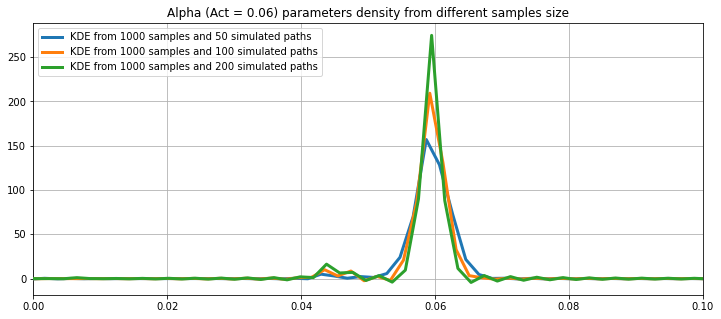

In [14]:
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
kde1000.fit()
kde4000 = sm.nonparametric.KDEUnivariate(sim1000_half.iloc[:, 1].values)
kde4000.fit()
kde8000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 1].values)
kde8000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde4000.support, kde4000.density, lw = 3, label = 'KDE from 1000 samples and 50 simulated paths', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples and 100 simulated paths', zorder = 10)
ax.plot(kde8000.support, kde8000.density, lw = 3, label = 'KDE from 1000 samples and 200 simulated paths', zorder = 10)
plt.title('Alpha (Act = 0.06) parameters density from different samples size')
ax.set_xlim((0.0, 0.1))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

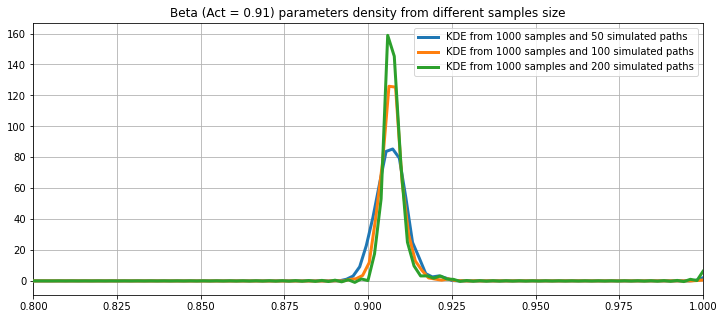

In [15]:
kde1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 3].values)
kde1000.fit()
kde4000 = sm.nonparametric.KDEUnivariate(sim1000_half.iloc[:, 2].values)
kde4000.fit()
kde8000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 2].values)
kde8000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde4000.support, kde4000.density, lw = 3, label = 'KDE from 1000 samples and 50 simulated paths', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples and 100 simulated paths', zorder = 10)
ax.plot(kde8000.support, kde8000.density, lw = 3, label = 'KDE from 1000 samples and 200 simulated paths', zorder = 10)

plt.title('Beta (Act = 0.91) parameters density from different samples size')
ax.set_xlim((0.8, 1.0))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)